In [2]:
!pip install pandas

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 5.1 MB/s eta 0:00:00a 0:00:01
Using cached pytz-2025.2-py2.py3-none-any.whl (509 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [4]:
!pip install matplotlib

  Using cached contourpy-1.3.3-cp312-cp312-macosx_10_13_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-macosx_10_13_x86_64.whl.metadata (6.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 10.4 MB/s eta 0:00:00a 0:00:01m
Using cached contourpy-1.3.3-cp312-cp312-macosx_10_13_x86_64.whl (293 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 5.3 MB/s eta 0:00:0000:01:00:01
Using cached kiwisolver-1.4.9-cp312-cp312-macosx_10_13_x86_64.whl (66 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 11.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print("📊 Статистика датасетов:")
print(f"Обучающая выборка: {train_df.shape}")
print(f"Тестовая выборка: {test_df.shape}")

# Проверяем столбцы
print(f"\nКолонки train: {train_df.columns.tolist()}")
print(f"Колонки test: {test_df.columns.tolist()}")

📊 Статистика датасетов:
Обучающая выборка: (10780, 6)
Тестовая выборка: (2697, 6)

Колонки train: ['id', 'subject', 'body', 'text', 'category', 'category_id']
Колонки test: ['id', 'subject', 'body', 'text', 'category', 'category_id']


In [21]:
!pip install nltk


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [5]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>
[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1000)>


False

In [7]:
import re
from nltk.corpus import stopwords
import nltk

# Скачиваем необходимые ресурсы NLTK один раз
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
except:
    nltk.download('punkt')
    nltk.download('stopwords')

# Кэшируем стоп-слова для скорости
STOP_WORDS = set(stopwords.words('english'))

def clean_email_text(text):
    """Оптимизированная функция очистки текста"""
    if pd.isna(text):
        return ""

    text = str(text)

    # Быстрые операции очистки
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)  # Убираем лишние пробелы
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)  # URL
    text = re.sub(r'\S+@\S+', '', text)  # Email
    text = re.sub(r'<.*?>', '', text)  # HTML теги
    text = re.sub(r'[^a-z\s]', '', text)  # Только буквы и пробелы

    # Удаление стоп-слов (оптимизировано)
    words = text.split()
    words = [word for word in words if word not in STOP_WORDS and len(word) > 2]

    return ' '.join(words)

# Применяем очистку
print("🧹 Очистка текстов...")
train_df['clean_text'] = train_df['text'].apply(clean_email_text)
test_df['clean_text'] = test_df['text'].apply(clean_email_text)

print("✅ Очистка завершена!")
print(f"Пример очищенного текста:\n{train_df['clean_text'].iloc[0][:200]}...")

🧹 Очистка текстов...
✅ Очистка завершена!
Пример очищенного текста:
anniversary special buy one get one free loyal customer get exclusive examplecom offer code welcome...


In [10]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 3.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.6/23.6 MB 4.9 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
import pickle

# Векторизатор текста
print("📊 Векторизация текста...")
vectorizer = TfidfVectorizer(
    max_features=3000,           # Оптимально для 12K+ примеров
    ngram_range=(1, 2),          # Учитываем биграммы
    min_df=5,                    # Игнорируем редкие слова
    max_df=0.8,                  # Игнорируем слишком частые слова
    stop_words='english'         # Используем встроенные стоп-слова
)

# Обучаем векторизатор ТОЛЬКО на train данных
X_train = vectorizer.fit_transform(train_df['clean_text'])
X_test = vectorizer.transform(test_df['clean_text'])

print(f"Размер train матрицы: {X_train.shape}")
print(f"Размер test матрицы: {X_test.shape}")

# Кодирование меток
print("\n🎯 Кодирование меток...")
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_df['category'])
y_test = label_encoder.transform(test_df['category'])

# Проверяем кодировку
print(f"Категории: {dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))}")
print(f"Train labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")

📊 Векторизация текста...
Размер train матрицы: (10780, 3000)
Размер test матрицы: (2697, 3000)

🎯 Кодирование меток...
Категории: {'forum': 0, 'promotions': 1, 'social_media': 2, 'spam': 3, 'updates': 4, 'verify_code': 5}
Train labels shape: (10780,)
Test labels shape: (2697,)


In [12]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import time

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
    'Linear SVM': LinearSVC(max_iter=1000, random_state=42),
    'Multinomial NB': MultinomialNB(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    print(f"\n🔧 Обучение {name}...")
    start_time = time.time()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    train_time = time.time() - start_time

    results[name] = {
        'accuracy': accuracy,
        'time': train_time,
        'model': model,
        'predictions': y_pred
    }

    print(f"   Точность: {accuracy:.4f}")
    print(f"   Время обучения: {train_time:.2f} сек")

# Выводим лучшую модель
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
print(f"\n🏆 Лучшая модель: {best_model_name} (accuracy: {results[best_model_name]['accuracy']:.4f})")


🔧 Обучение Logistic Regression...


/Users/maria/DataspellProjects/spacy/myenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


   Точность: 0.9822
   Время обучения: 0.27 сек

🔧 Обучение Random Forest...
   Точность: 0.9800
   Время обучения: 0.61 сек

🔧 Обучение Linear SVM...
   Точность: 0.9837
   Время обучения: 0.14 сек

🔧 Обучение Multinomial NB...
   Точность: 0.9781
   Время обучения: 0.01 сек

🔧 Обучение Gradient Boosting...
   Точность: 0.9670
   Время обучения: 29.72 сек

🏆 Лучшая модель: Linear SVM (accuracy: 0.9837)



📈 Детальный отчет для Linear SVM:
              precision    recall  f1-score   support

       forum       0.97      0.98      0.97       450
  promotions       0.99      1.00      0.99       449
social_media       0.99      0.98      0.98       449
        spam       0.98      0.98      0.98       449
     updates       0.97      0.98      0.98       449
 verify_code       0.99      1.00      0.99       451

    accuracy                           0.98      2697
   macro avg       0.98      0.98      0.98      2697
weighted avg       0.98      0.98      0.98      2697



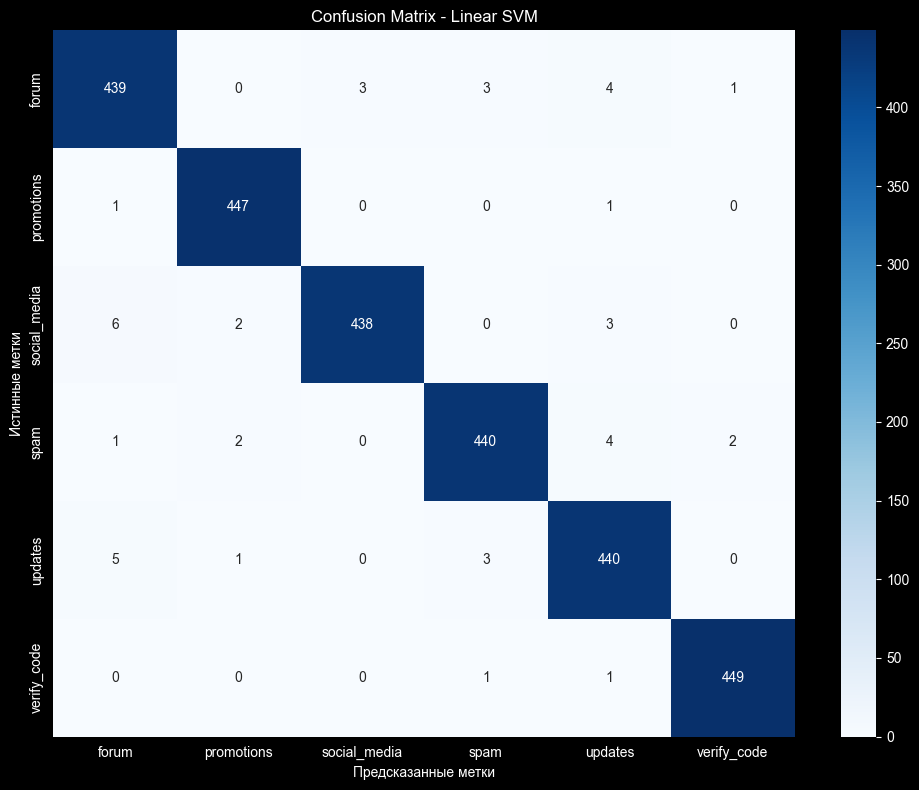


🔍 Анализ основных ошибок:
Наиболее частые ошибки:
  social_media → forum: 6 раз
  updates → forum: 5 раз
  spam → updates: 4 раз
  forum → updates: 4 раз
  forum → spam: 3 раз


In [13]:
# Получаем лучшую модель
best_model = results[best_model_name]['model']
y_pred = results[best_model_name]['predictions']

print(f"\n📈 Детальный отчет для {best_model_name}:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Матрица ошибок
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Истинные метки')
plt.xlabel('Предсказанные метки')
plt.tight_layout()
plt.show()

# Топ ошибок
print("\n🔍 Анализ основных ошибок:")
errors = []
for i in range(len(y_test)):
    if y_test[i] != y_pred[i]:
        true_label = label_encoder.inverse_transform([y_test[i]])[0]
        pred_label = label_encoder.inverse_transform([y_pred[i]])[0]
        errors.append((true_label, pred_label))

from collections import Counter
error_counts = Counter(errors)
print("Наиболее частые ошибки:")
for (true, pred), count in error_counts.most_common(5):
    print(f"  {true} → {pred}: {count} раз")